### Forza user data analysis to retrieve insights about user retention and usage pattern

In [1]:
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_forza4=pd.read_csv('forza_horizon4_yearly.csv',index_col=None)
df_forza4.head()
df_forza5=pd.read_csv('forza_horizon5_yearly.csv',index_col=None)
df_forza5.head()

,DateTime,Players,Average Players,Flags
0,2021-11-09 00:00:00,70726,NaN,NaN
1,2021-11-10 00:00:00,74323,NaN,NaN
2,2021-11-11 00:00:00,80859,NaN,NaN
3,2021-11-12 00:00:00,73966,NaN,NaN
4,2021-11-13 00:00:00,81096,NaN,NaN


In [3]:
df_forza4.shape

(871, 4)

In [4]:
df_forza5.shape

(626, 4)

In [5]:
#Convert to datatime to extract month and year next
df_forza4['DateTime']=pd.to_datetime(df_forza4['DateTime'])
df_forza5['DateTime']=pd.to_datetime(df_forza5['DateTime'])

In [6]:
x4=df_forza4['DateTime']
x5=df_forza5['DateTime']

### Data Prep-processing/Extracting

In [7]:
df_forza5['Year']=df_forza5['DateTime'].dt.year
df_forza5['Month']=df_forza5['DateTime'].dt.month
df_forza5['Day']=df_forza5['DateTime'].dt.day

df_forza4['Year']=df_forza4['DateTime'].dt.year
df_forza4['Month']=df_forza4['DateTime'].dt.month
df_forza4['Day']=df_forza4['DateTime'].dt.day

### Convert Date to int

In [8]:
df_forza5.astype({'Month':'int'})
df_forza5.astype({'Year':'int'})
df_forza5.astype({'Day':'int'})

df_forza4.astype({'Month':'int'})
df_forza4.astype({'Year':'int'})
df_forza4.astype({'Day':'int'})

,DateTime,Players,Average Players,Flags,Year,Month,Day
0,2021-03-09,3125,NaN,NaN,2021,3,9
1,2021-03-10,14609,NaN,NaN,2021,3,10
2,2021-03-11,20203,NaN,NaN,2021,3,11
3,2021-03-12,21235,NaN,NaN,2021,3,12
4,2021-03-13,23993,NaN,NaN,2021,3,13
...,...,...,...,...,...,...,...
866,2023-07-23,9642,5966.0,NaN,2023,7,23
867,2023-07-24,8832,5098.0,NaN,2023,7,24
868,2023-07-25,8679,4972.0,NaN,2023,7,25
869,2023-07-26,8644,4933.0,NaN,2023,7,26


In [9]:
df_forza5_new = df_forza5[['Month','Year','Day','Players']].copy()
df_forza4_new = df_forza4[['Month','Year','Day','Players']].copy()

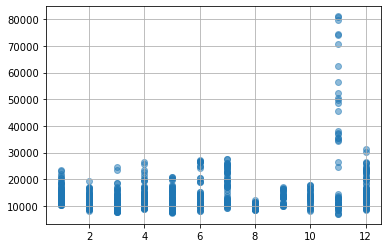

In [10]:
plt.scatter(df_forza5['Month'],df_forza5['Players'], alpha=0.5)
plt.grid()
plt.show()

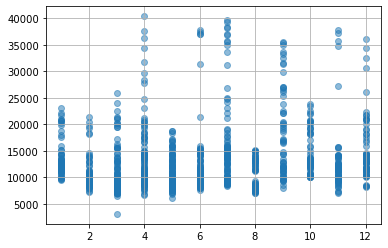

In [11]:
plt.scatter(df_forza4['Month'],df_forza4['Players'], alpha=0.5)
plt.grid()
plt.show()

### Boxplot for Forza 5 for all the years  based on Month and Year

<AxesSubplot:xlabel='Month', ylabel='Players'>

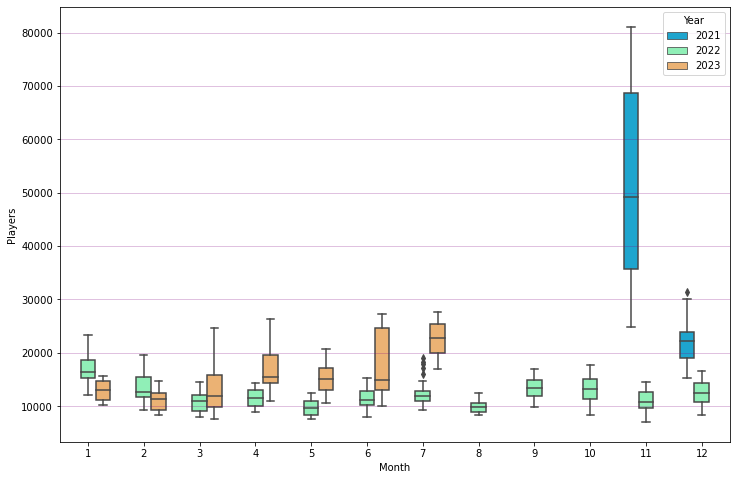

In [12]:
plt.figure(figsize=(12,8))
plt.grid(c='purple',alpha=0.3)
sns.boxplot(x=df_forza5_new['Month'], y=df_forza5_new['Players'],hue=df_forza5_new['Year'], data=df_forza5_new,palette='rainbow')

### Boxplot for Forza 4 for all the years  based on Month and Year

<AxesSubplot:xlabel='Month', ylabel='Players'>

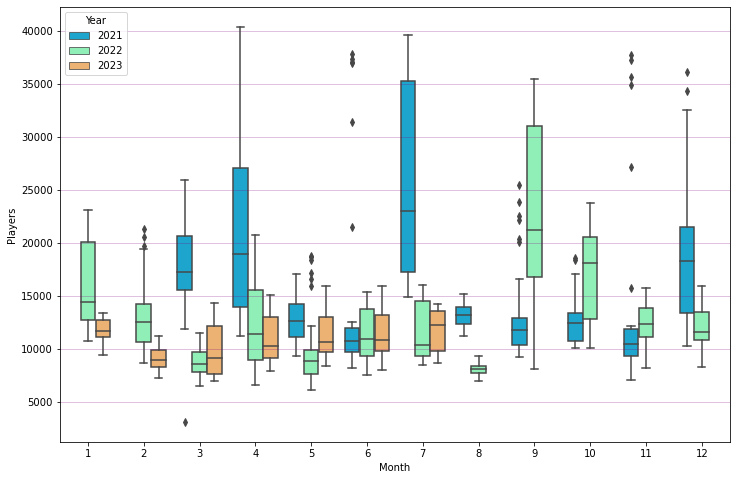

In [13]:
plt.figure(figsize=(12,8))
plt.grid(c='purple',alpha=0.3)
sns.boxplot(x=df_forza4_new['Month'], y=df_forza4_new['Players'],hue=df_forza4_new['Year'], data=df_forza4_new,palette='rainbow')

### Drop the year 2021 for both datasets

In [14]:
forza5_year = df_forza5_new[df_forza5_new.Year > 2021]
forza5_year

,Month,Year,Day,Players
53,1,2022,1,23423
54,1,2022,2,23068
55,1,2022,3,19778
56,1,2022,4,18456
57,1,2022,5,18603
...,...,...,...,...
621,7,2023,23,19849
622,7,2023,24,17686
623,7,2023,25,17075
624,7,2023,26,17014


In [15]:
forza4_year = df_forza4_new[df_forza4_new.Year > 2021]
forza4_year

,Month,Year,Day,Players
298,1,2022,1,22120
299,1,2022,2,23079
300,1,2022,3,20608
301,1,2022,4,20809
302,1,2022,5,20683
...,...,...,...,...
866,7,2023,23,9642
867,7,2023,24,8832
868,7,2023,25,8679
869,7,2023,26,8644


### Boxplot for Forza 5 based on Month and Year

<AxesSubplot:xlabel='Month', ylabel='Players'>

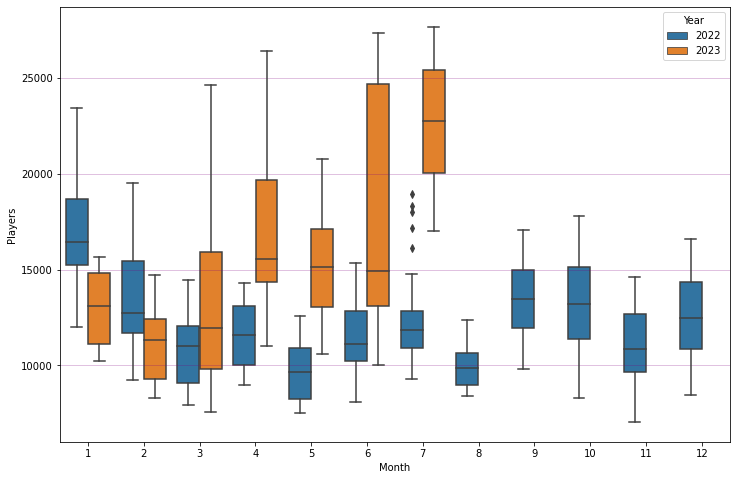

In [16]:
plt.figure(figsize=(12,8))
plt.grid(c='purple',alpha=0.3)
sns.boxplot(x=forza5_year['Month'], y=forza5_year['Players'],hue=forza5_year['Year'], data=forza5_year)

### Boxplot for Forza 4  based on Month and Year

<AxesSubplot:xlabel='Month', ylabel='Players'>

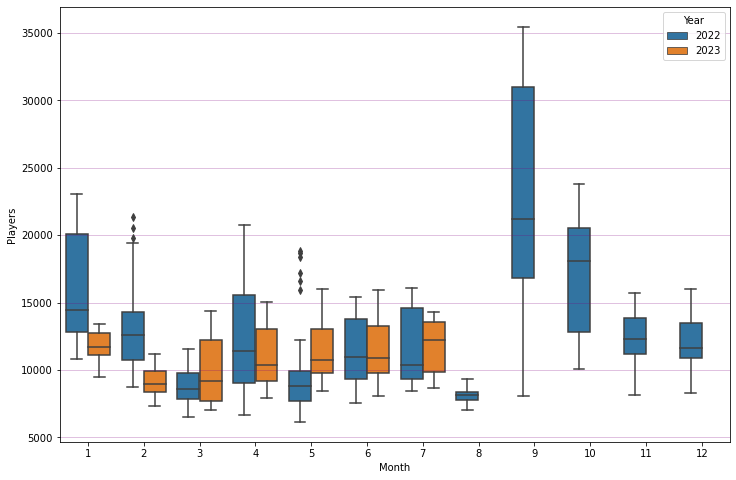

In [17]:
plt.figure(figsize=(12,8))
plt.grid(c='purple',alpha=0.3)
sns.boxplot(x=forza4_year['Month'], y=forza4_year['Players'],hue=forza4_year['Year'], data=forza4_year)

<AxesSubplot:xlabel='Month', ylabel='Players'>

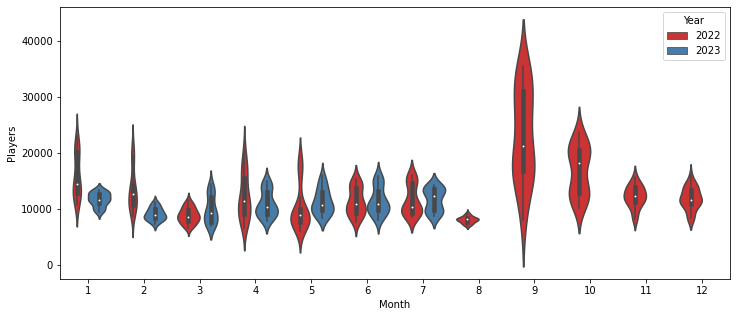

In [18]:
plt.figure(figsize=(12,5))
sns.violinplot(x=forza4_year['Month'], y=forza4_year['Players'], hue=forza4_year['Year'], data=forza4_year,palette='Set1')

### Boxplot for Forza 4  based on Day and Year

<AxesSubplot:xlabel='Day', ylabel='Players'>

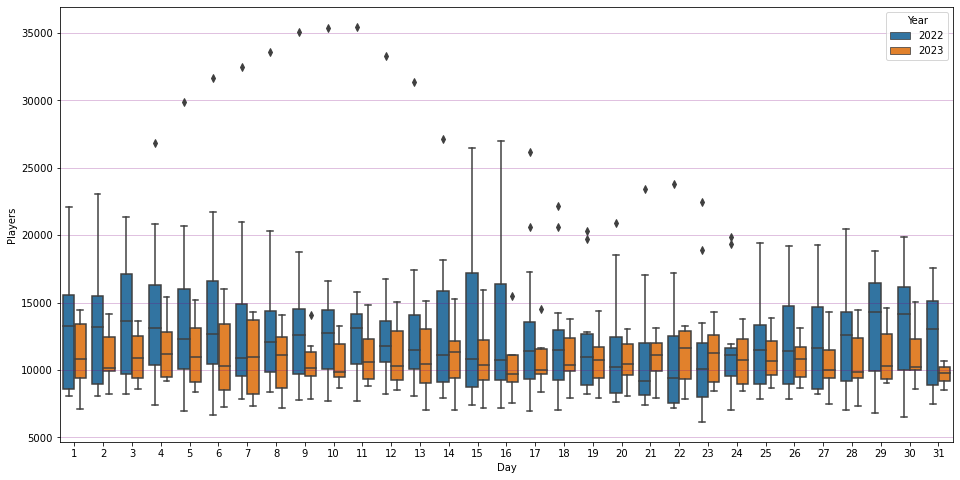

In [19]:
plt.figure(figsize=(16,8))
plt.grid(c='purple',alpha=0.3)
sns.boxplot(x=forza4_year['Day'], y=forza4_year['Players'],hue=forza4_year['Year'], data=forza4_year)

### Boxplot for Forza 5  based on Day and Year

<AxesSubplot:xlabel='Day', ylabel='Players'>

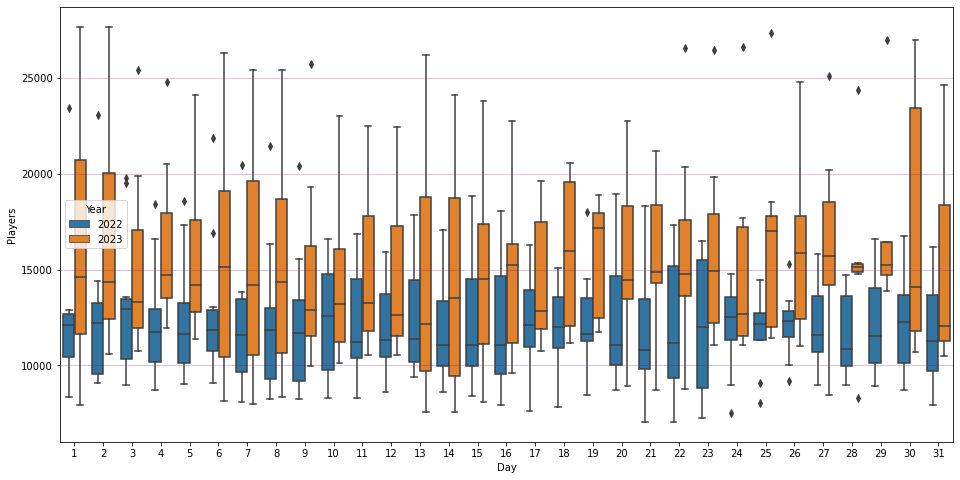

In [20]:
plt.figure(figsize=(16,8))
plt.grid(c='purple',alpha=0.3)
sns.boxplot(x=forza5_year['Day'], y=forza5_year['Players'],hue=forza5_year['Year'], data=forza5_year)

### Checking Day-Wise Distribution for Forza 4

In [21]:
forza4_day=pd.read_csv('forza_horizon4_yearly.csv',index_col=None)
forza4_day['DateTime']=pd.to_datetime(df_forza4['DateTime'])

In [22]:
from datetime import datetime

dayName=[]

for i in range(len(forza4_day['DateTime'])):
# get datetime
    dt = forza4_day['DateTime'][i]
#get weekday name
    dayName.append(dt.strftime('%A'))
    

In [23]:
forza4_day['Dayname']=dayName

In [24]:
forza4_day['Year']=forza4_year['Year']
forza4_day['Month']=forza4_year['Month']

<AxesSubplot:xlabel='Dayname', ylabel='Players'>

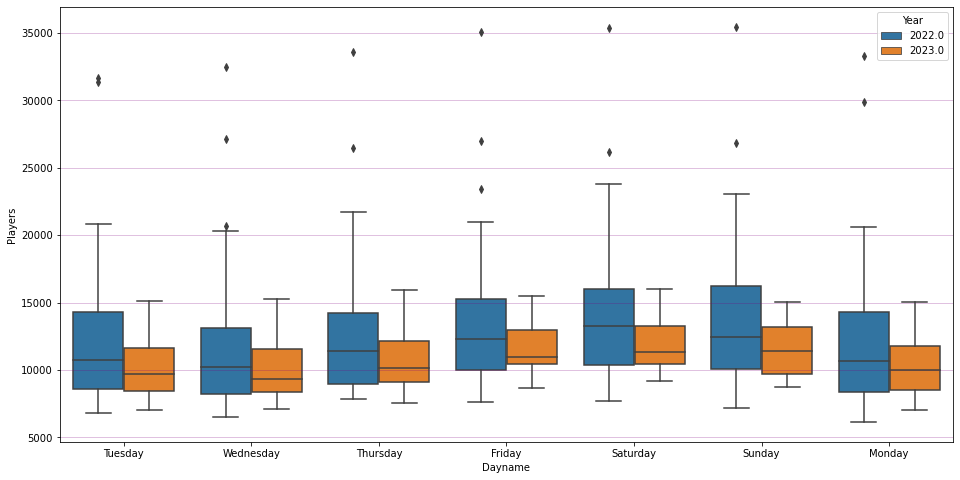

In [25]:
plt.figure(figsize=(16,8))
plt.grid(c='purple',alpha=0.3)
sns.boxplot(x=forza4_day['Dayname'], y=forza4_day['Players'],hue=forza4_day['Year'], data=forza4_day)

<AxesSubplot:xlabel='Dayname', ylabel='Players'>

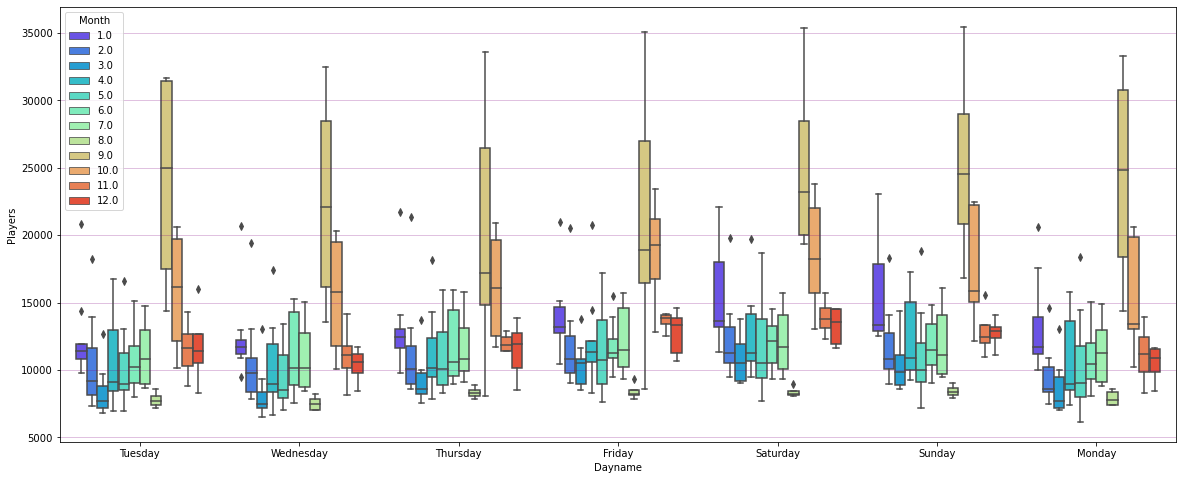

In [26]:
plt.figure(figsize=(20,8))
plt.grid(c='purple',alpha=0.3)
sns.boxplot(x=forza4_day['Dayname'], y=forza4_day['Players'],hue=forza4_day['Month'], data=forza4_day,palette='rainbow')

### Checking Day-Wise Distribution for Forza 5

In [27]:
forza5_day=pd.read_csv('forza_horizon5_yearly.csv',index_col=None)
forza5_day['DateTime']=pd.to_datetime(df_forza5['DateTime'])

In [28]:
dayName5=[]

for i in range(len(forza5_day['DateTime'])):
# get datetime
    dt = forza5_day['DateTime'][i]
#get weekday name
    dayName5.append(dt.strftime('%A'))
    

In [29]:
forza5_day['Dayname']=dayName5
forza5_day['Year']=forza5_year['Year']
forza5_day['Month']=forza5_year['Month']

<AxesSubplot:title={'center':'Forza 5'}, xlabel='Dayname', ylabel='Players'>

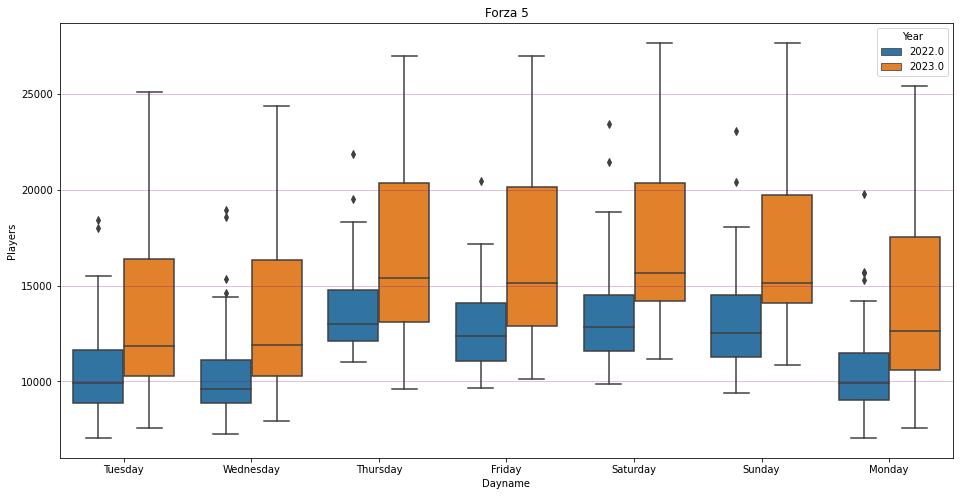

In [30]:
plt.figure(figsize=(16,8))
plt.grid(c='purple',alpha=0.3)
plt.title('Forza 5')
sns.boxplot(x=forza5_day['Dayname'], y=forza5_day['Players'],hue=forza5_day['Year'], data=forza5_day)

<AxesSubplot:title={'center':'Forza 5 Month vs Day'}, xlabel='Dayname', ylabel='Players'>

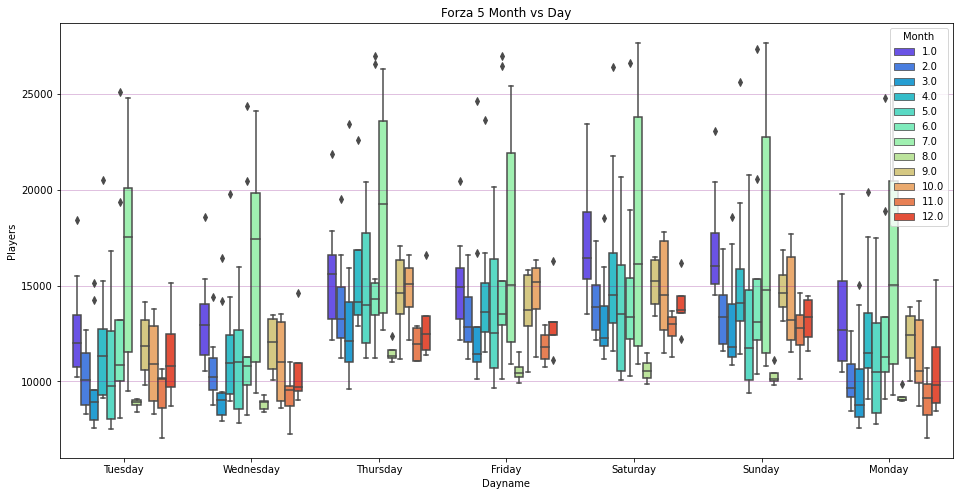

In [31]:
plt.figure(figsize=(16,8))
plt.grid(c='purple',alpha=0.3)
plt.title('Forza 5 Month vs Day')
sns.boxplot(x=forza5_day['Dayname'], y=forza5_day['Players'],hue=forza5_day['Month'], data=forza5_day,palette='rainbow')

## Calculate no.of players per year for Horizon 5

In [32]:
player2021=df_forza5_new[df_forza5_new.Year == 2021].Players
print(player2021)

0     70726
1     74323
2     80859
3     73966
4     81096
5     79767
6     62275
7     56628
8     52222
9     49809
10    45527
11    50309
12    48506
13    37924
14    34711
15    34210
16    37331
17    35307
18    37024
19    35355
20    26361
21    24767
22    23325
23    26038
24    26457
25    31367
26    30158
27    21719
28    20869
29    19982
30    23558
31    22660
32    25166
33    22223
34    17121
35    16211
36    16269
37    18553
38    18424
39    20310
40    19710
41    16143
42    15832
43    15331
44    19880
45    20637
46    23553
47    24071
48    23812
49    22795
50    22857
51    26245
52    24355
Name: Players, dtype: int64


In [33]:
print(player2021.sum())

1804634


In [34]:
player2022=df_forza5_new[df_forza5_new.Year == 2022].Players

In [35]:
player2023=df_forza5_new[df_forza5_new.Year == 2023].Players

In [36]:
print(player2021.sum())
print(player2022.sum())
print(player2023.sum())

1804634
4444615
3245368


#### 2021 - 2022 : 1.64% increase, 2022 - 2023 : 0.2689% decrease

## Calculate no. of players per year for Horizon 4

In [37]:
player2021_h4=df_forza4_new[df_forza4_new.Year == 2021].Players
player2022_h4=df_forza4_new[df_forza4_new.Year == 2022].Players
player2023_h4=df_forza4_new[df_forza4_new.Year == 2023].Players

In [38]:
print(player2021_h4)

0       3125
1      14609
2      20203
3      21235
4      23993
       ...  
293    21058
294    20790
295    20856
296    21724
297    22339
Name: Players, Length: 298, dtype: int64


In [39]:
print(player2021_h4.sum())
print(player2022_h4.sum())
print(player2023_h4.sum())

4897604
4726870
2264177


#### 2021 - 2022 : 0.034% decrease, 2022 - 2023 : 0.52% decrease